In [1]:
import torch

In [ ]:
## shape of the input embedding -> (1, 3)
## input sequence will have 4 inputs, 

In [46]:
a = [torch.rand(1, 3) for _ in range(4)]

a1 = torch.concat(a, dim = 0).T

weights = torch.tensor([1, 2, 3, 4], dtype = torch.float32)

w1 = weights.view(4, 1)

torch.matmul(a1, w1)

tensor([[2.8770],
        [3.4513],
        [7.1633]])

In [2]:
import torch
inputs = torch.tensor(
                [[0.43, 0.15, 0.89],
                [0.55, 0.87, 0.66],
                [0.57, 0.85, 0.64],
                [0.22, 0.58, 0.33],
                [0.77, 0.25, 0.10],
                [0.05, 0.80, 0.55]])

In [25]:
query = inputs[1]



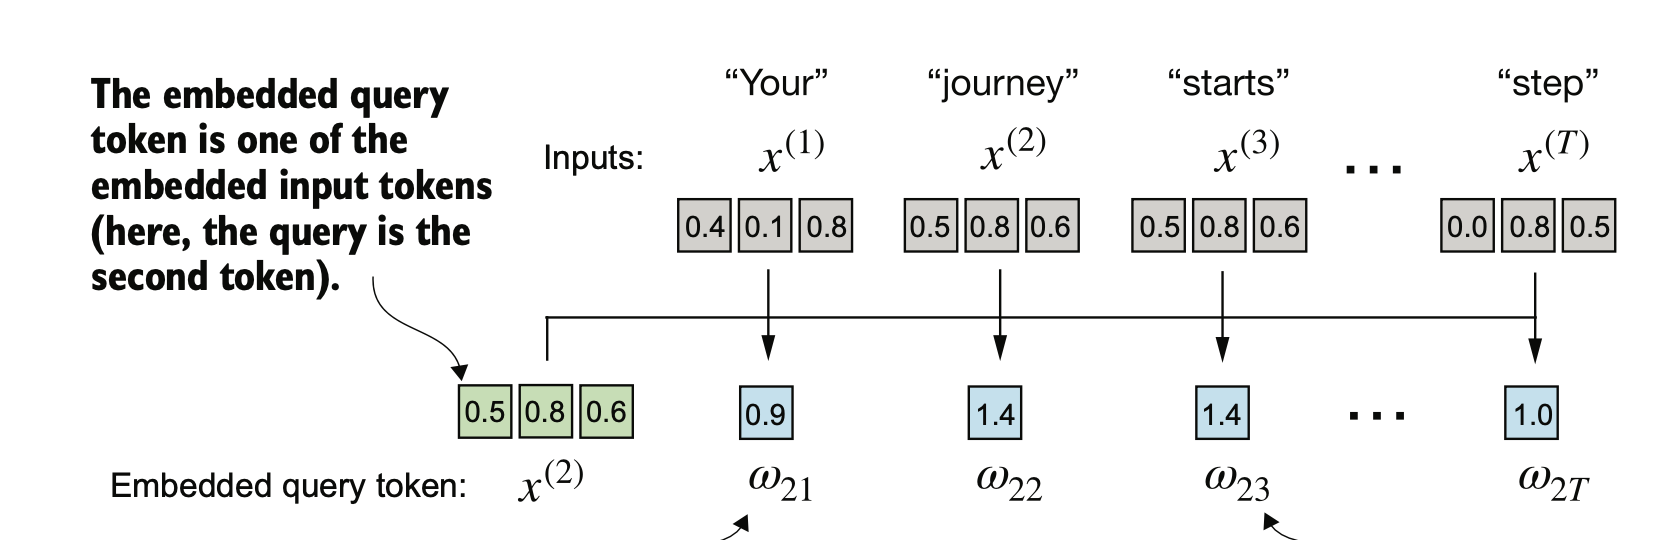

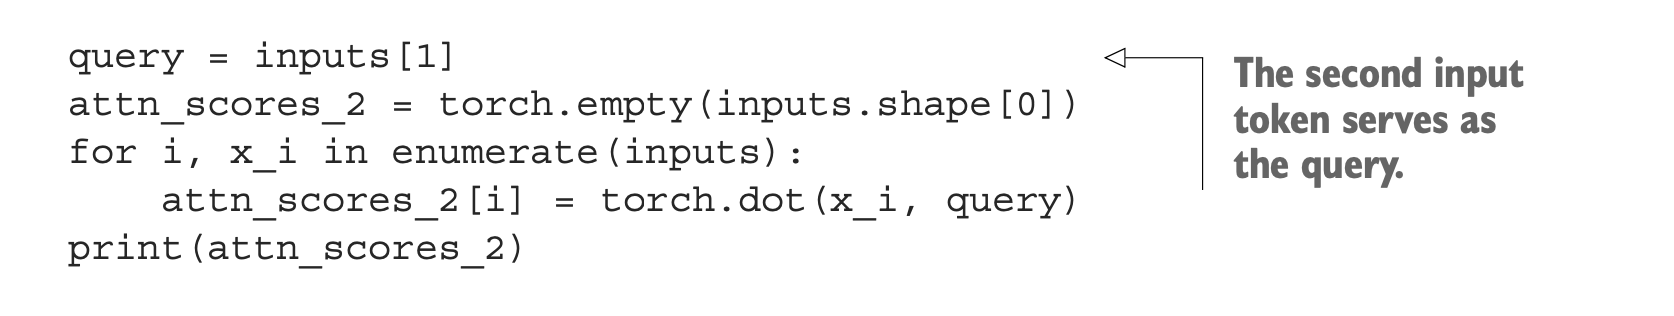

In [28]:
print(inputs.shape)
inputs

torch.Size([6, 3])


tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [30]:
query = inputs[1]

attn_scores_2 = torch.empty(inputs.shape[0])

for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)

print(attn_scores_2)
    

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


### Normalization of the attention scores (for training stability)

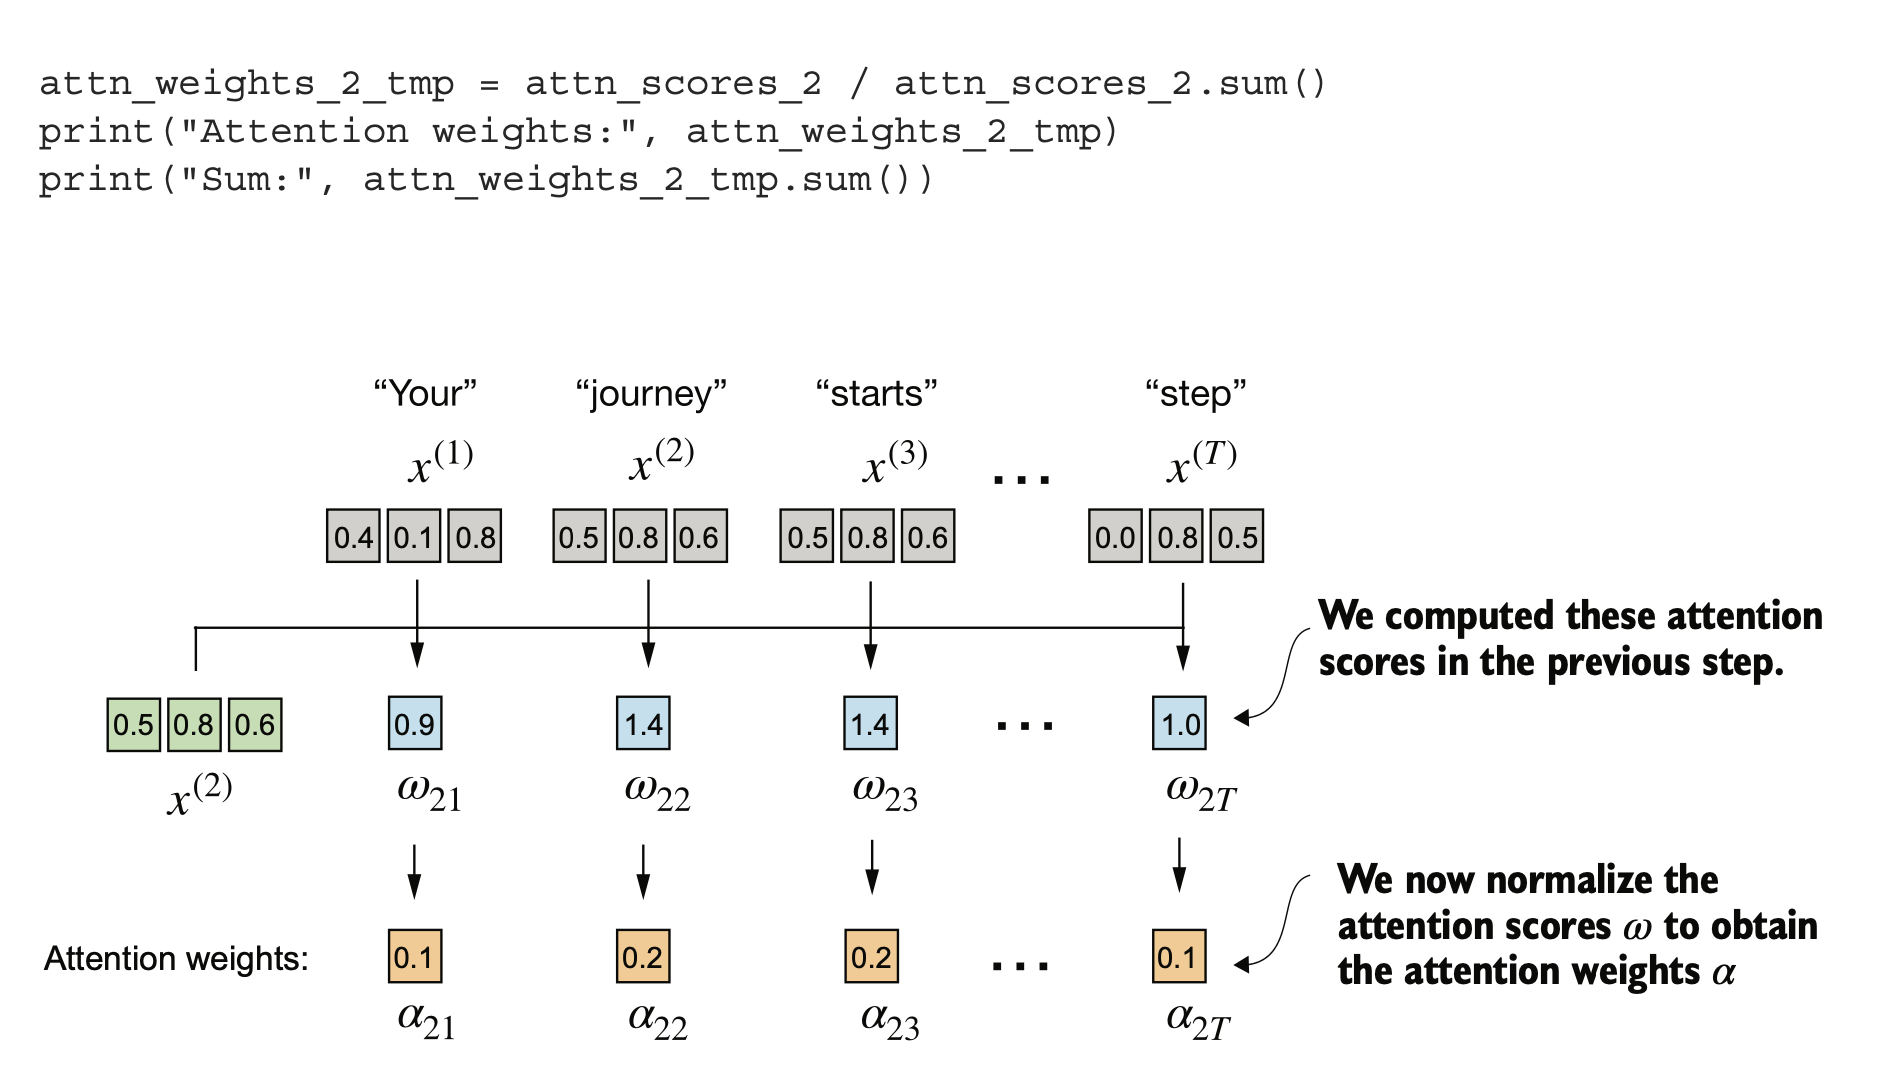

In [34]:
### using regular normalization

attn_weights_2_tmp = attn_scores_2/attn_scores_2.sum()

print(attn_weights_2_tmp)
print(attn_weights_2_tmp.sum())


tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
tensor(1.0000)


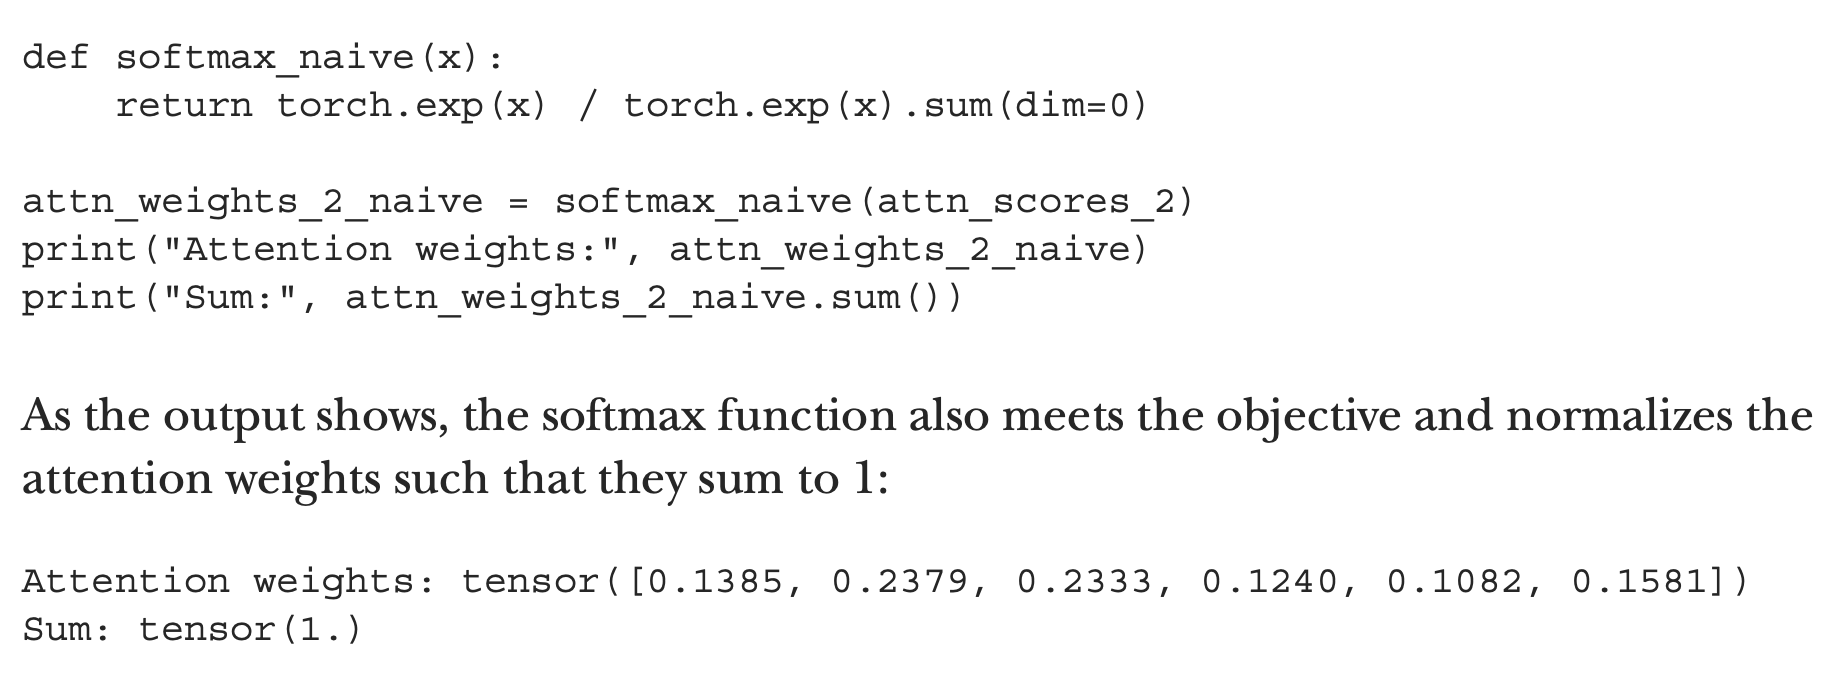

In [44]:
### Using Sofmax for Normalization

def naive_softmax(x):

    return torch.exp(x)/torch.exp(x).sum(dim = 0)

print(naive_softmax(attn_scores_2))

print(naive_softmax(attn_scores_2).sum())

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
tensor(1.)


In [42]:
attn_scores_2.sum(dim = 0)

torch.exp(attn_scores_2).sum(dim = 0)

tensor(18.7453)

### Softmax as a squishing function

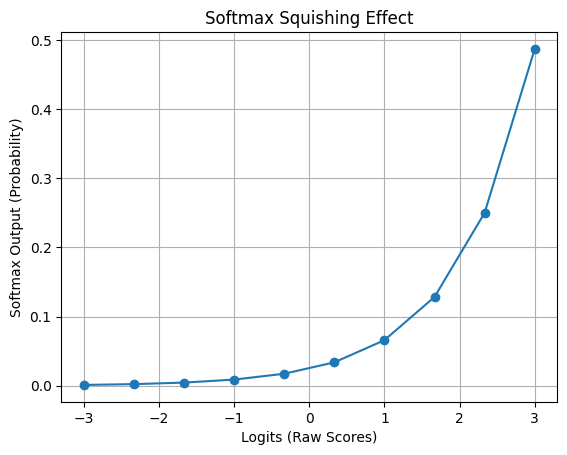

In [38]:
import matplotlib.pyplot as plt
import numpy as np

logits = torch.tensor(np.linspace(-3, 3, 10))  # Generate 10 values from -3 to 3
softmax_values = torch.nn.functional.softmax(logits, dim=0)

plt.plot(logits.numpy(), softmax_values.numpy(), marker='o', linestyle='-')
plt.xlabel("Logits (Raw Scores)")
plt.ylabel("Softmax Output (Probability)")
plt.title("Softmax Squishing Effect")
plt.grid()
plt.show()


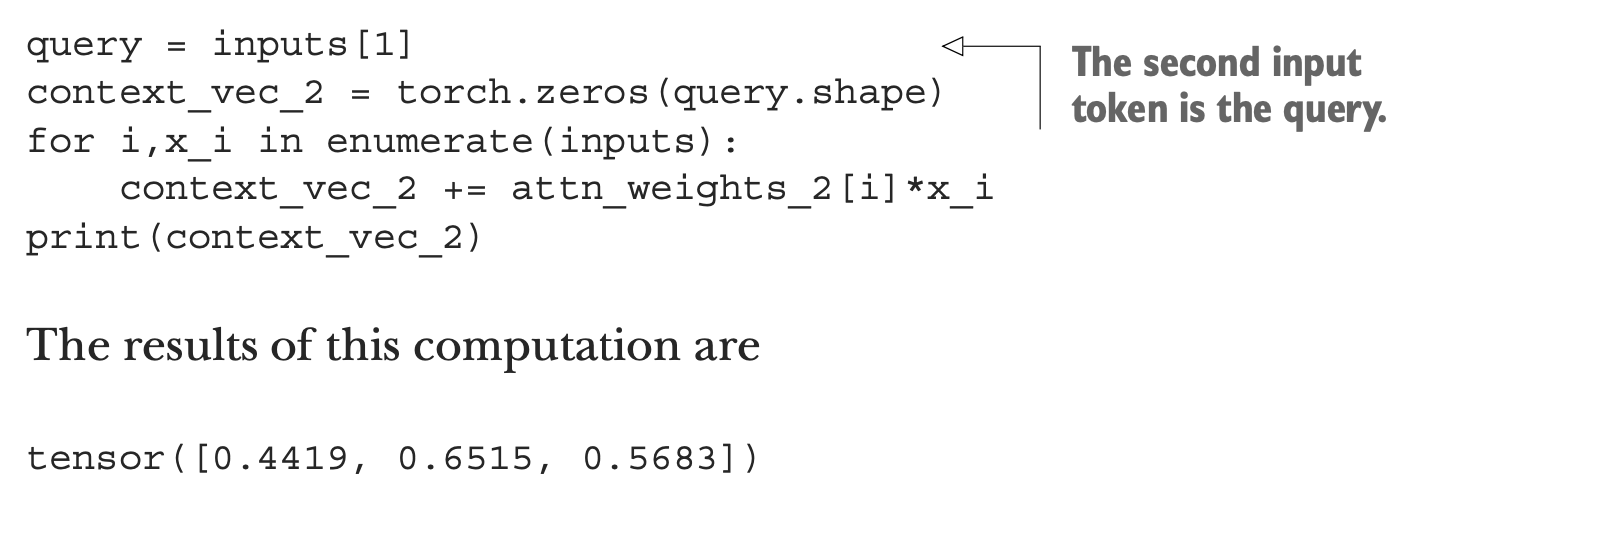

In [56]:
attn_scores_2_naive = naive_softmax(attn_scores_2)

context_vec_2 = torch.zeros(query.shape)

## establishing the dimensions of the context vectors
query.shape[0]

for i, x_i in enumerate(inputs):
    context_vec_2 += attn_scores_2_naive[i] * x_i

## context enhanced vector representation of the input
print(context_vec_2)
    

tensor([0.4419, 0.6515, 0.5683])


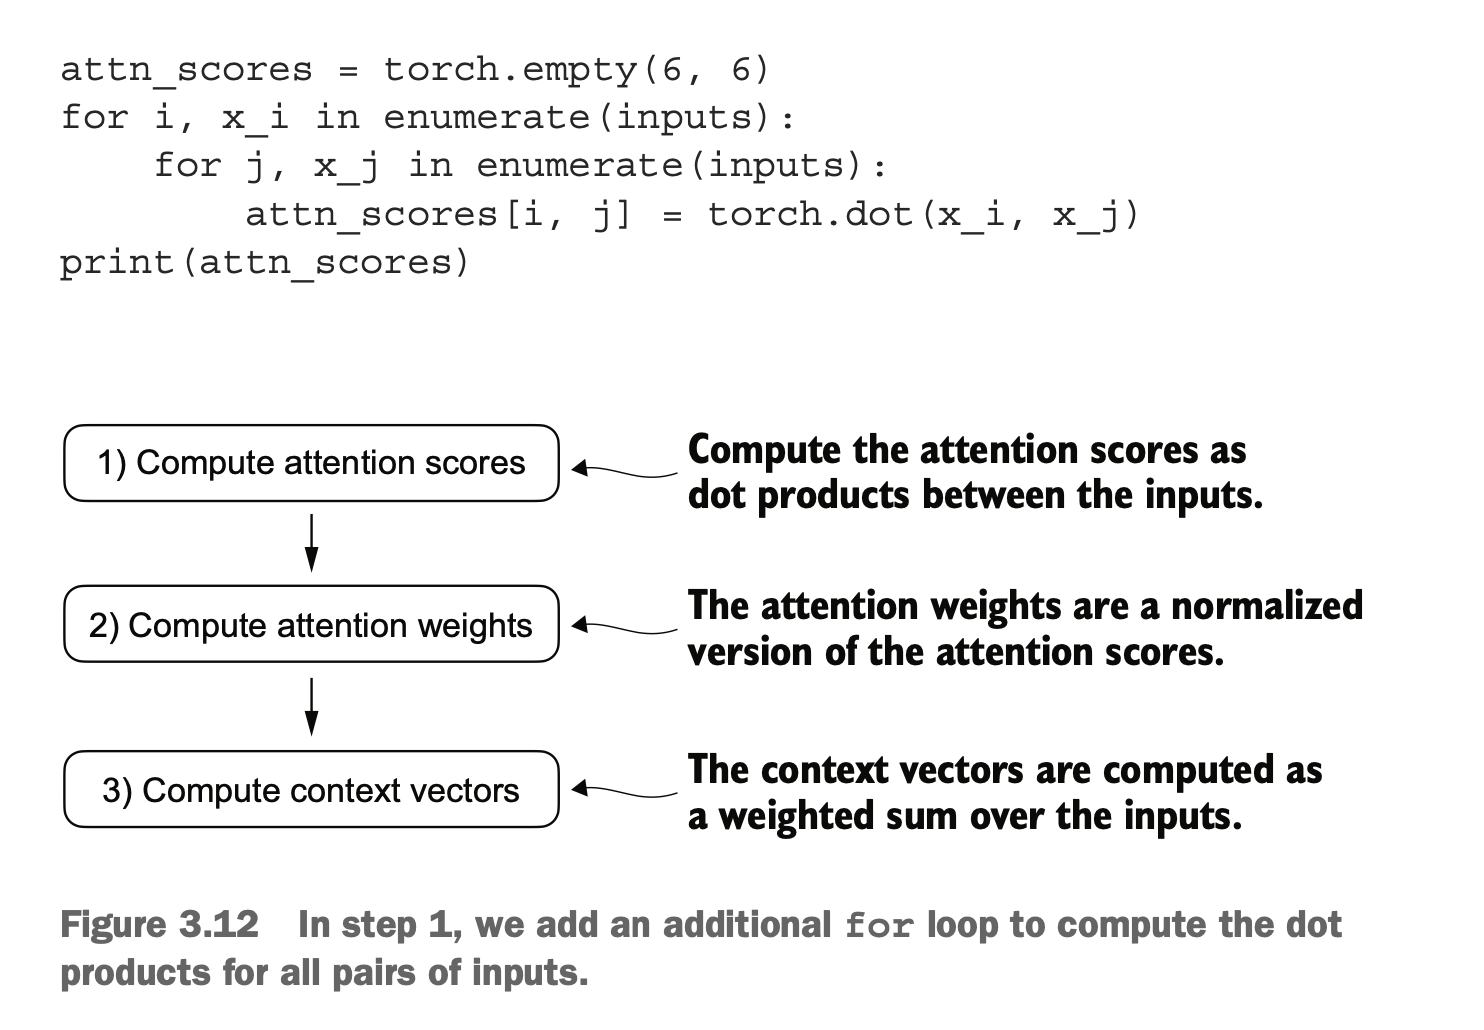

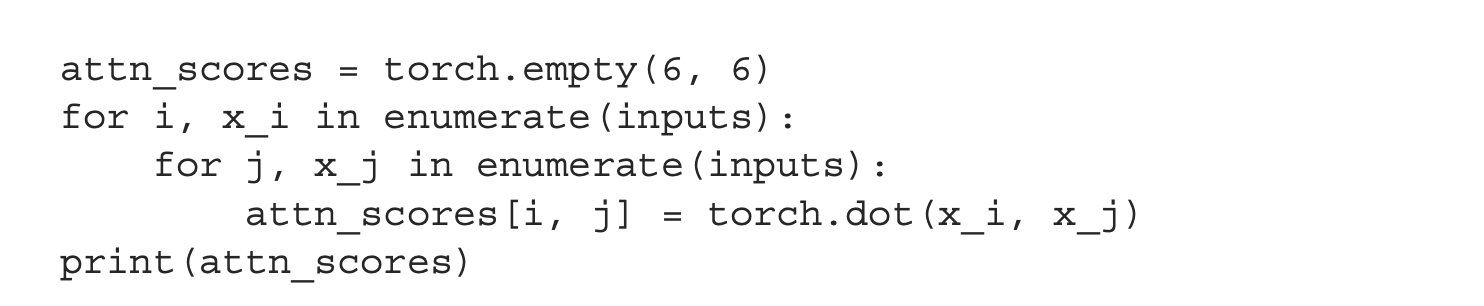

In [71]:
%%time

attn_scores = torch.empty(inputs.shape[0], inputs.shape[0])

## getting the attention scores for the entire input sequence

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)


tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])
CPU times: user 957 µs, sys: 709 µs, total: 1.67 ms
Wall time: 1.04 ms


In [77]:
%%time

## Achieving the same outcome using broadcasting in Torch

attn_scores = inputs@inputs.T
attn_scores

CPU times: user 250 µs, sys: 148 µs, total: 398 µs
Wall time: 356 µs


tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

## Process of what is being done

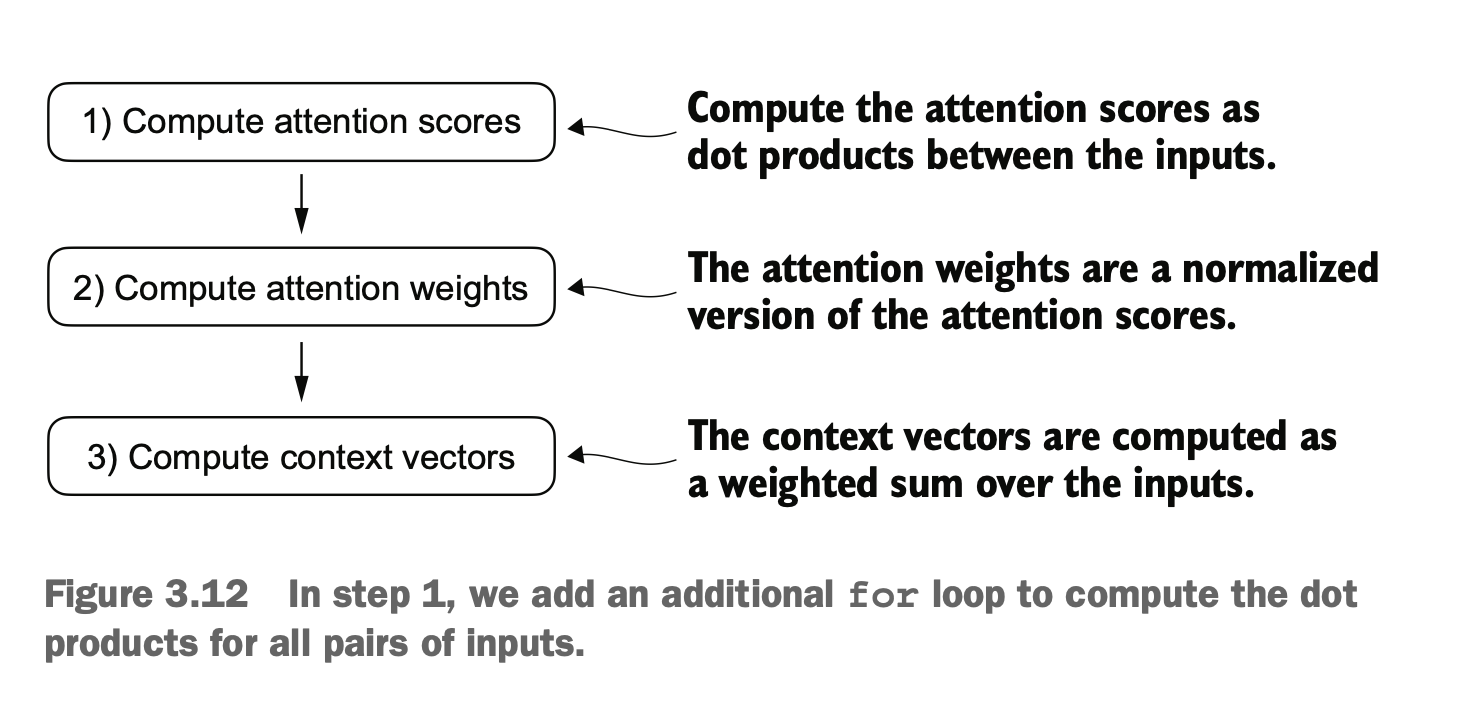

In [ ]:
## normalization of the attention scores ahead
## dim = -1, in the rows X columns tensor, dim = -1, would suggest applying softmax to the last dimension of the tensor ie. columns
## This would imply, that each of the row of the tensor would sum up to 1.
attn_scores_normalized = torch.softmax(attn_scores, dim = -1)

## the attention scores across a row would add up to 1.
attn_scores_normalized


tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

In [92]:
## the sum across the dim = -1, ie. 
print(attn_scores_normalized.sum(dim = -1))
print(attn_scores_normalized.sum(dim = 1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [103]:
## computing the context vectors for the input vectors
print(attn_scores_normalized.shape)
print(inputs.shape)

all_context_vecs = attn_scores_normalized@inputs

## context vector for each of the input vectors
all_context_vecs



torch.Size([6, 6])
torch.Size([6, 3])


tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])

### Implementation of the Scaled-Dot Product

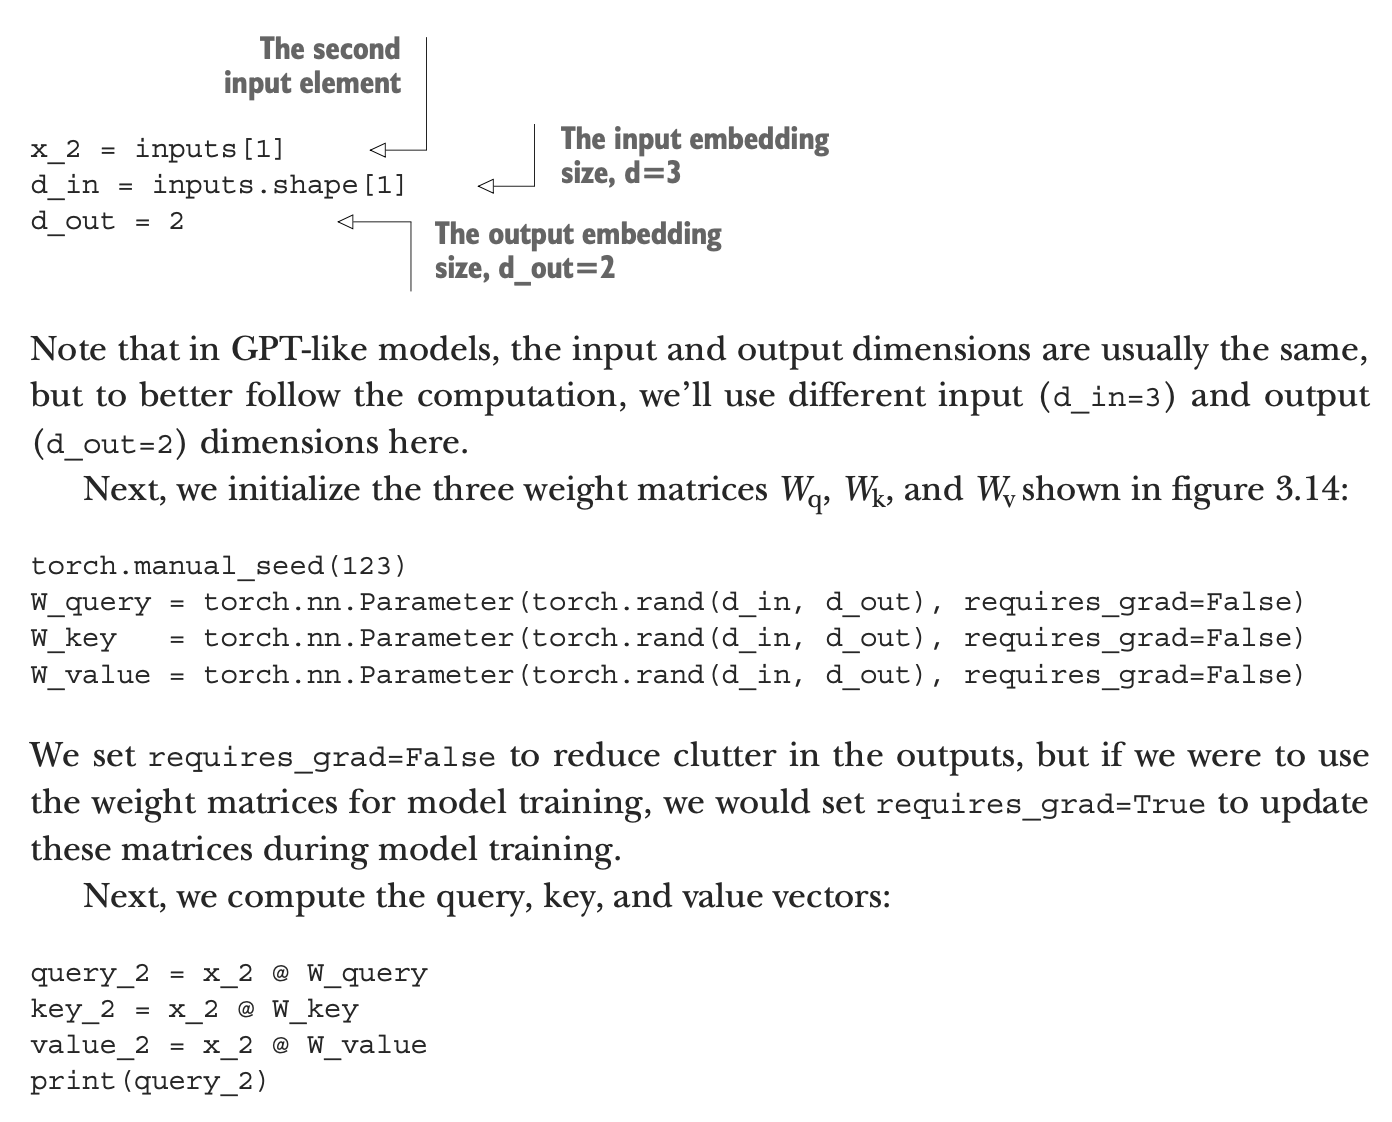 

In [6]:
x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2

torch.manual_seed(123)

W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad = False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad = False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad = False)


### Just to show the dummy calculation, we still need Key and Values for the other inputs as well 

In [154]:
## this multiplication with the Query, Key and value vectors, would lead to K
query_2 = x_2@W_query
key_2 = x_2@W_key
value_2 = x_2@W_value


### Complete Key and Value weights

In [ ]:


inputs.shape


torch.Size([6, 3])

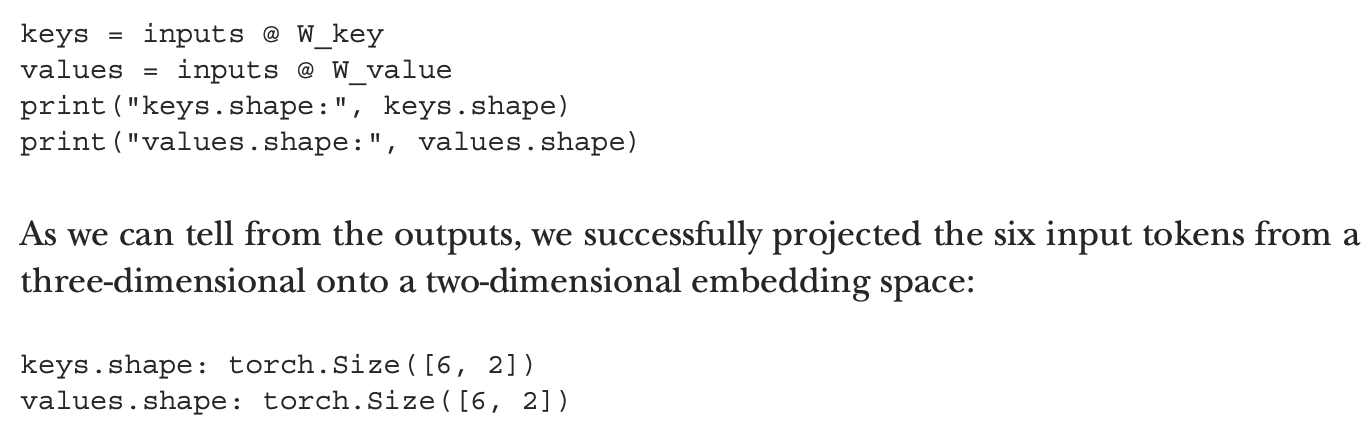

In [155]:
keys = inputs @ W_key
values = inputs @ W_value

print(f"Keys shape: {keys.shape}")
print(f"values shape: {values.shape}")


Keys shape: torch.Size([6, 2])
values shape: torch.Size([6, 2])


In [182]:
query_2

tensor([0.4306, 1.4551])

In [157]:
keys@query_2.T

/var/folders/07/s3n6k1zj6t7_ndmxx1x777_c0000gn/T/ipykernel_28949/2487573669.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3641.)
  keys@query_2.T


tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])

In [161]:
## computing the key vectors for query_2
keys_2 = keys[1]
attn_score_22 = query_2.dot(keys_2)

## single un-normalized attention score
print(attn_score_22)

tensor(1.8524)


In [166]:
## Attention weights for each of query[1]
attn_scores_2 = query_2@keys.T

print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [167]:
attn_scores_2

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])

In [168]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2/d_k**0.5, dim = -1)
print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


In [169]:
sum(attn_weights_2)

tensor(1.)

In [177]:
## mulplication of the attention scores with value vectors
context_vec_2 = attn_weights_2 @ values
context_vec_2


tensor([0.3061, 0.8210])

### Implementing a Self-attention Python Class

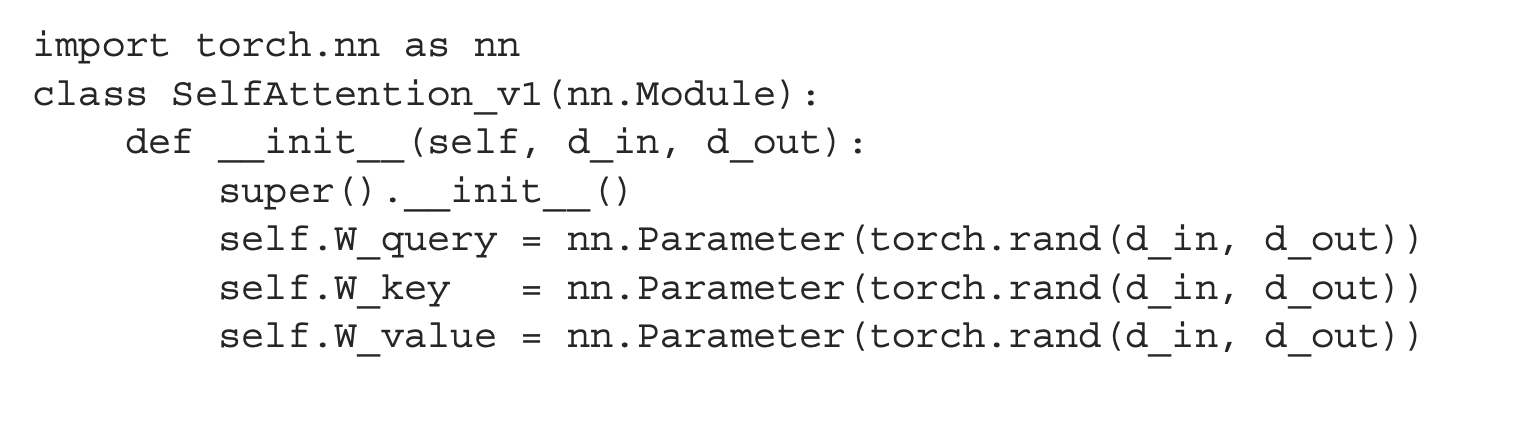

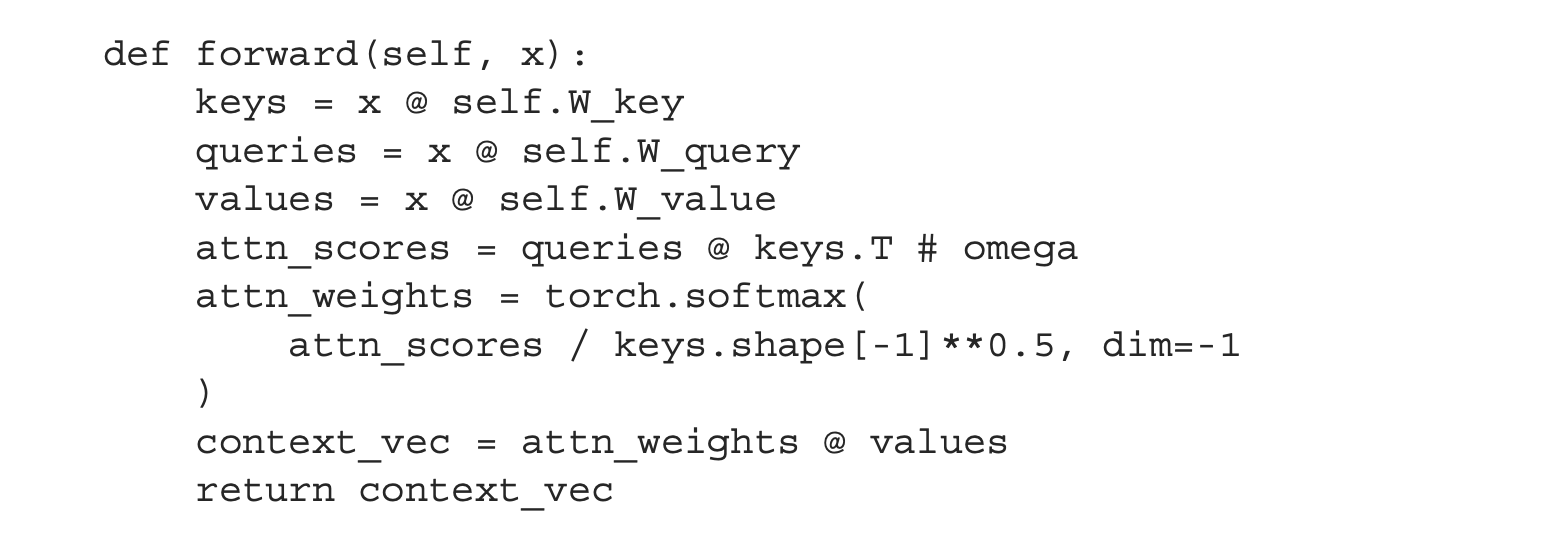

In [4]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))

    def forward(self, x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value

        attn_scores = queries@keys.T
        attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5, 
                                     dim = -1)
        context_vec = attn_weights @ values
        return context_vec
    


In [7]:
torch.manual_seed(123)
print(f"d_in:{d_in}, d_out:{d_out}")
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1.forward(inputs))

d_in:3, d_out:2
tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


### Using the Linear Layers

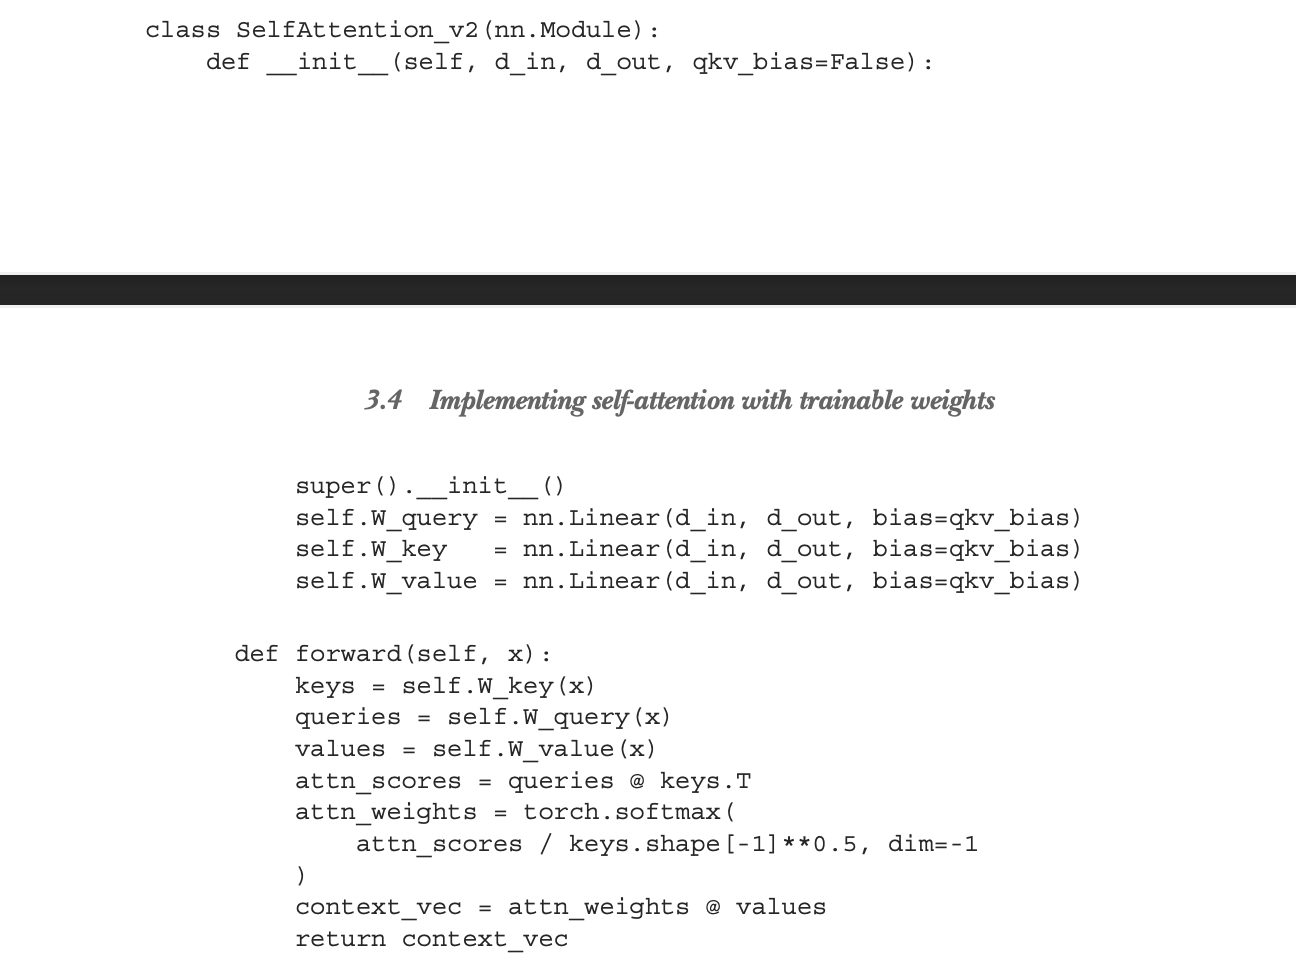

In [8]:

class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias = False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)

    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(
                attn_scores/keys.shape[-1]**0.5, dim = -1)
        context_vec = attn_weights @ values
        return context_vec
    
torch.manual_seed(789)
print(d_in, d_out)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))


3 2
tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

## Implementing Masked Attention

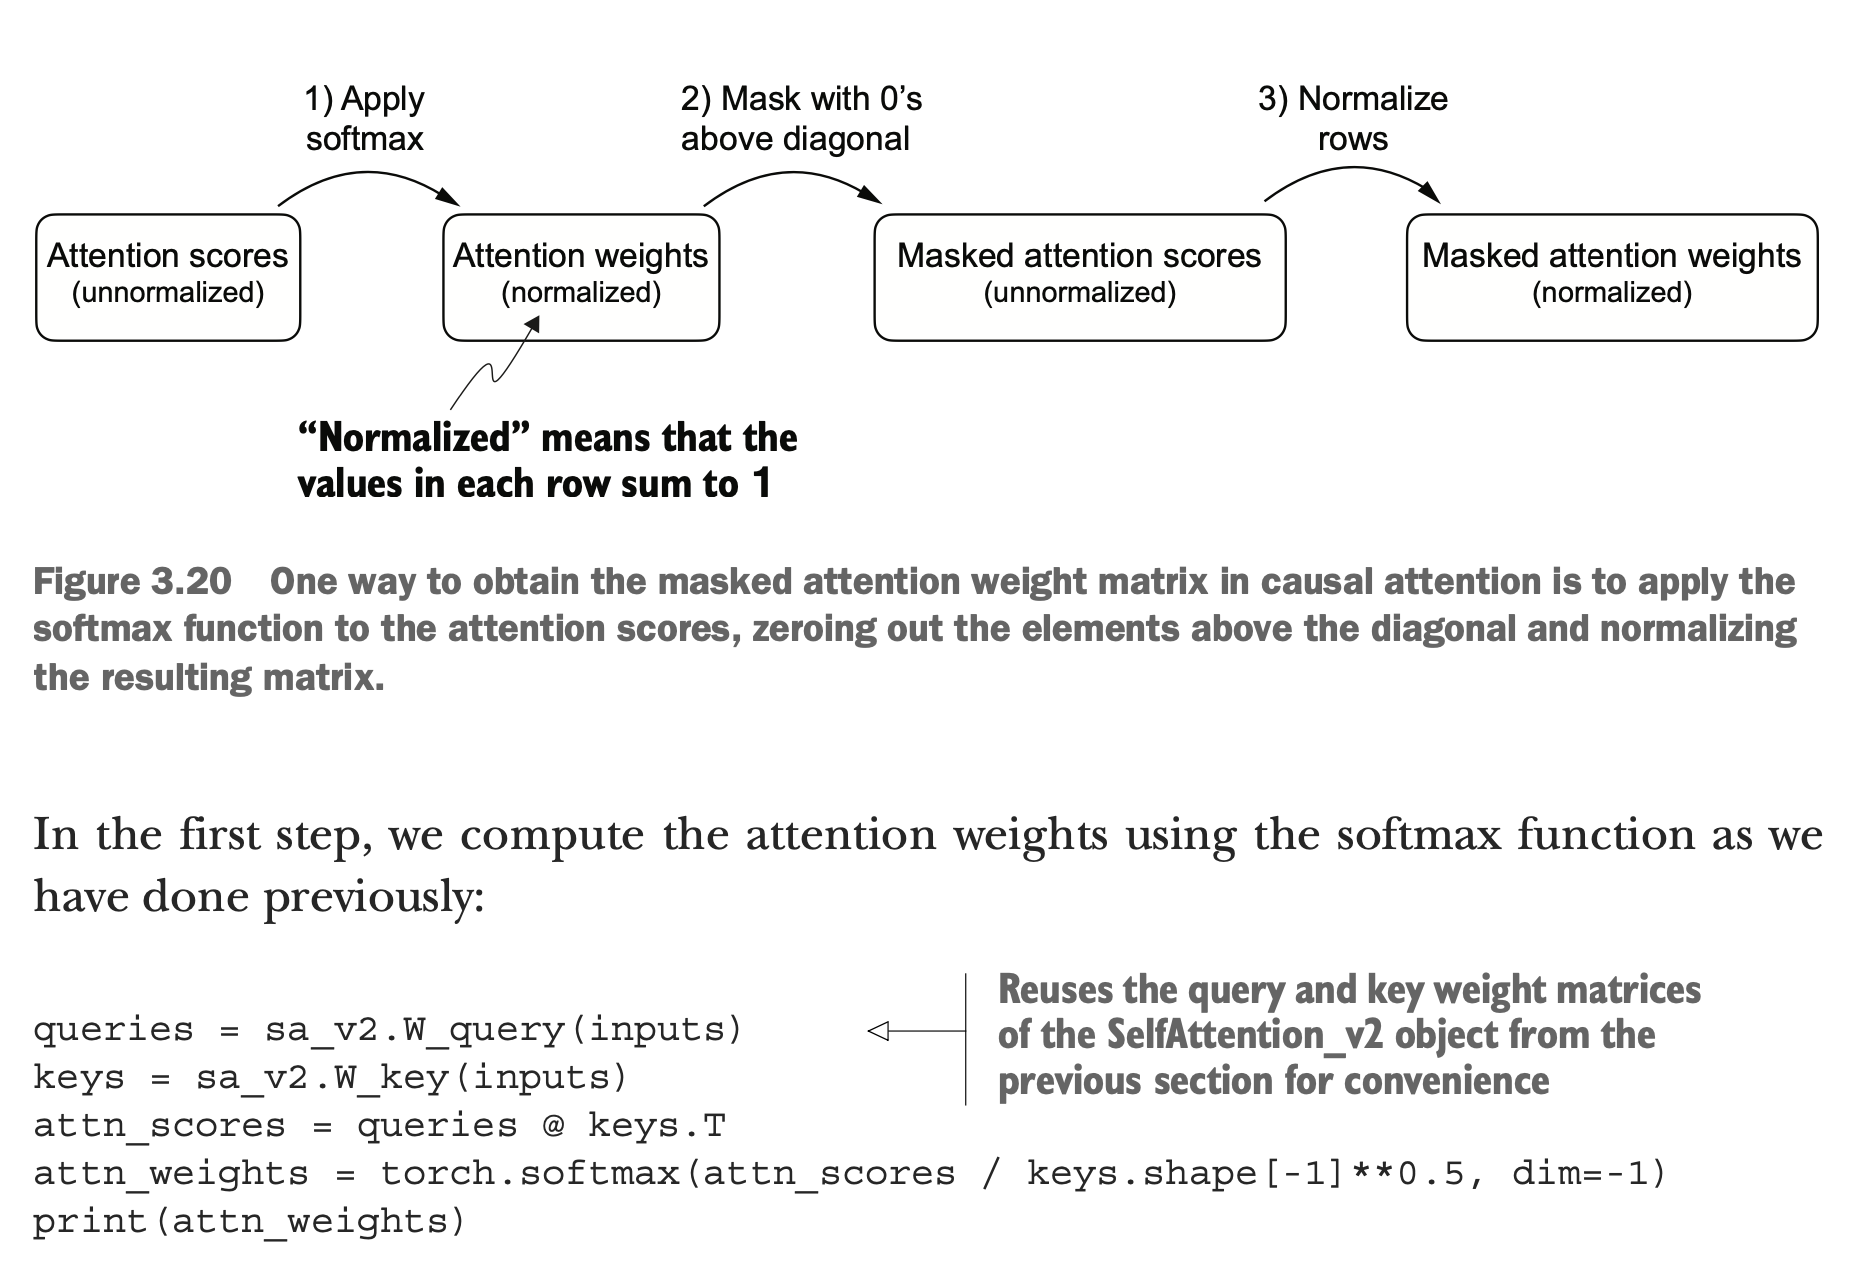

In [10]:
inputs.shape

torch.Size([6, 3])

In [13]:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)

print(queries.shape, keys.shape)

torch.Size([6, 2]) torch.Size([6, 2])


In [14]:
attn_scores = queries@keys.T
attn_scores

tensor([[ 0.2899,  0.0716,  0.0760, -0.0138,  0.1344, -0.0511],
        [ 0.4656,  0.1723,  0.1751,  0.0259,  0.1771,  0.0085],
        [ 0.4594,  0.1703,  0.1731,  0.0259,  0.1745,  0.0090],
        [ 0.2642,  0.1024,  0.1036,  0.0186,  0.0973,  0.0122],
        [ 0.2183,  0.0874,  0.0882,  0.0177,  0.0786,  0.0144],
        [ 0.3408,  0.1270,  0.1290,  0.0198,  0.1290,  0.0078]],
       grad_fn=<MmBackward0>)

In [17]:
attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5, dim = -1)
attn_weights

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)

### Creating the Masked attention using `torch.tril()`

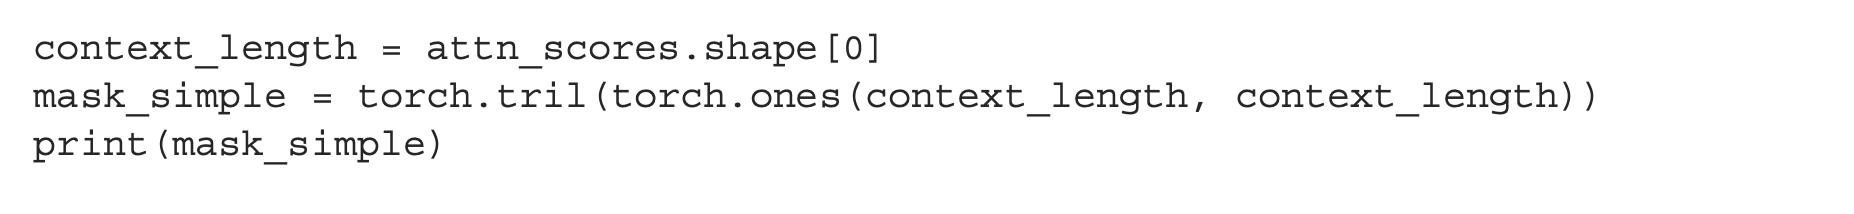

In [28]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [31]:
masked_simple = attn_weights * mask_simple
masked_simple


tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)

In [40]:
## Re-normalizing the attention weights so that each row sums up to one
rows_sum = masked_simple.sum(dim = -1, keepdim=True)
masked_simple_norm = masked_simple/rows_sum
masked_simple_norm

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)

### Applying Dropout on attention weights

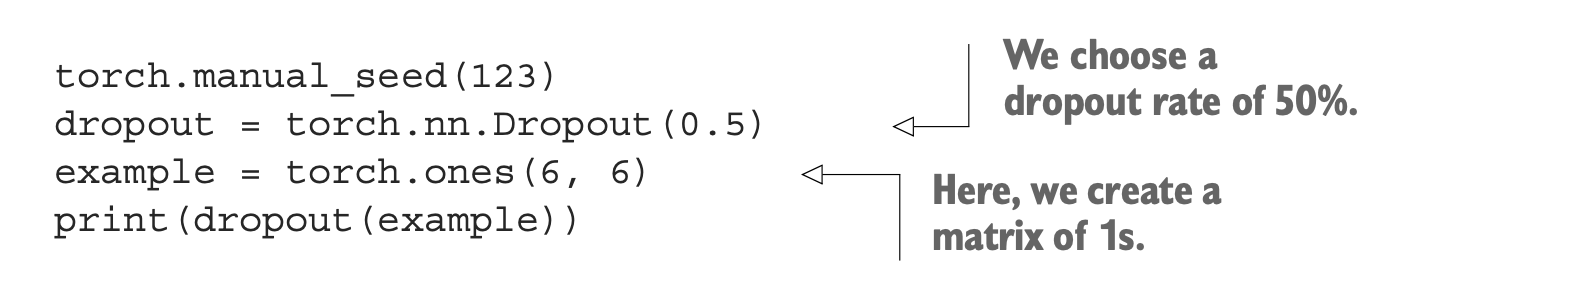

In [43]:
torch.manual_seed(123)

dropout = torch.nn.Dropout(0.5)

example = dropout(torch.ones(6, 6))

print(example)

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


In [44]:
attn_weights

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)

In [45]:
dropout(attn_weights)

tensor([[0.3843, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.3324, 0.0000, 0.3329, 0.2955],
        [0.0000, 0.3318, 0.3325, 0.2996, 0.3328, 0.2961],
        [0.0000, 0.0000, 0.3337, 0.3142, 0.0000, 0.3128],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.3317, 0.3169],
        [0.3869, 0.3327, 0.0000, 0.3084, 0.3331, 0.3058]],
       grad_fn=<MulBackward0>)

In [46]:
inputs.shape

torch.Size([6, 3])

In [51]:
torch.stack((inputs, inputs), dim = 1).shape

torch.Size([6, 2, 3])

### Implementing the Causal Attention Class

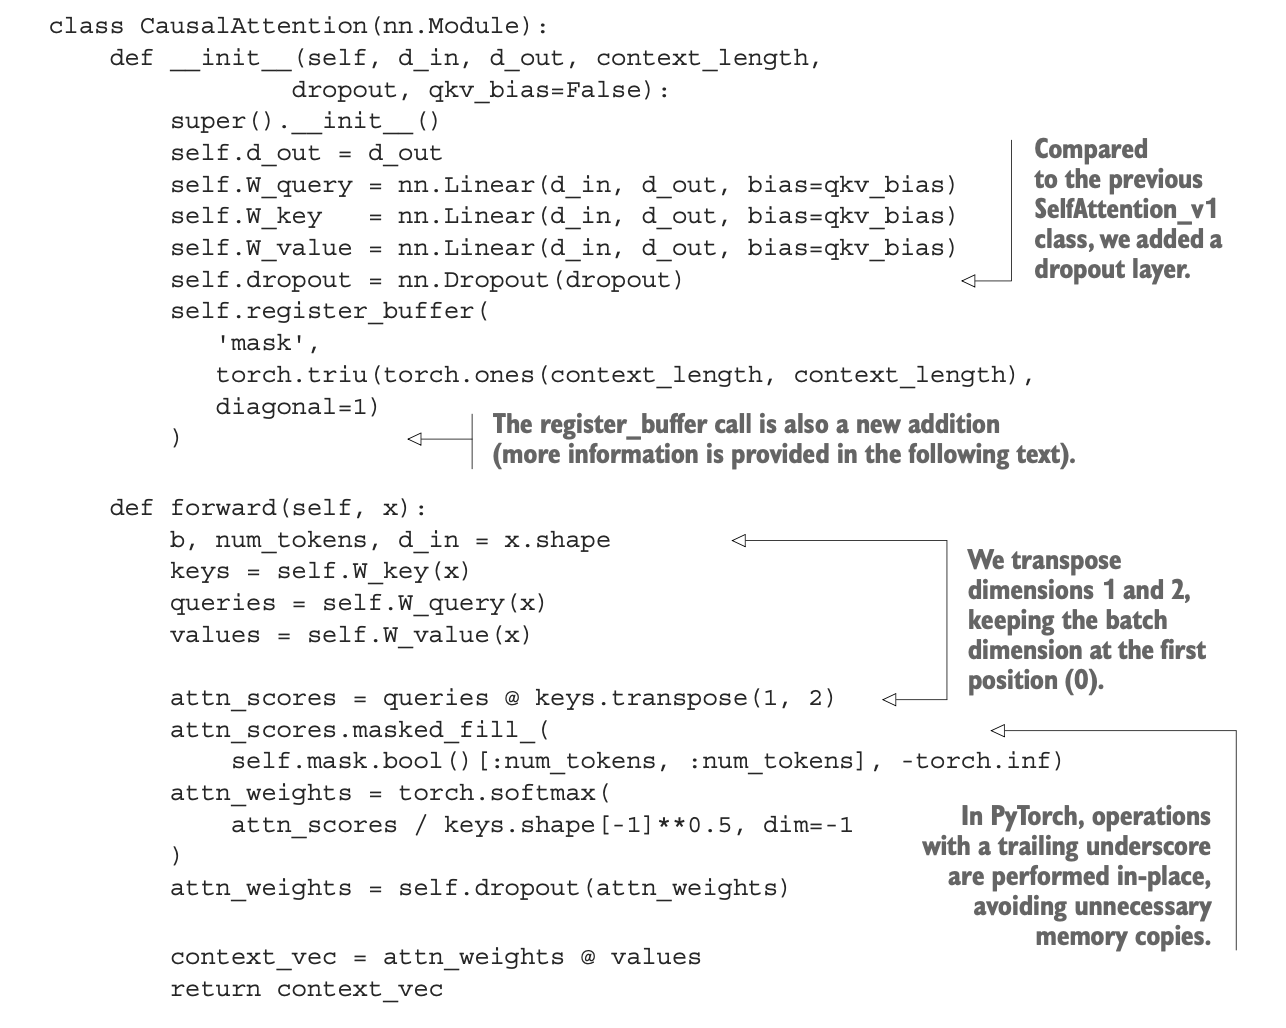

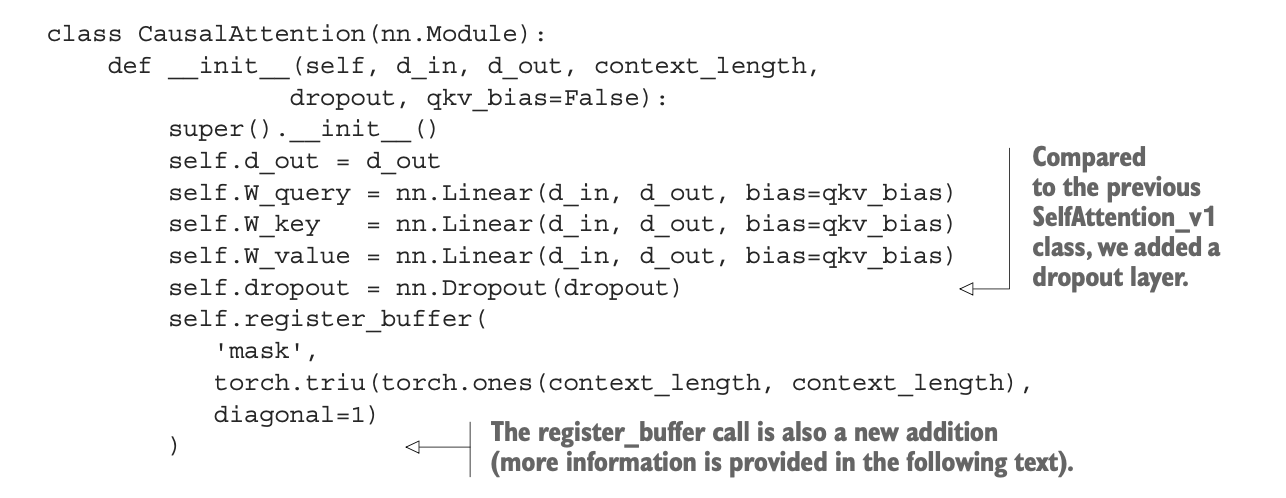

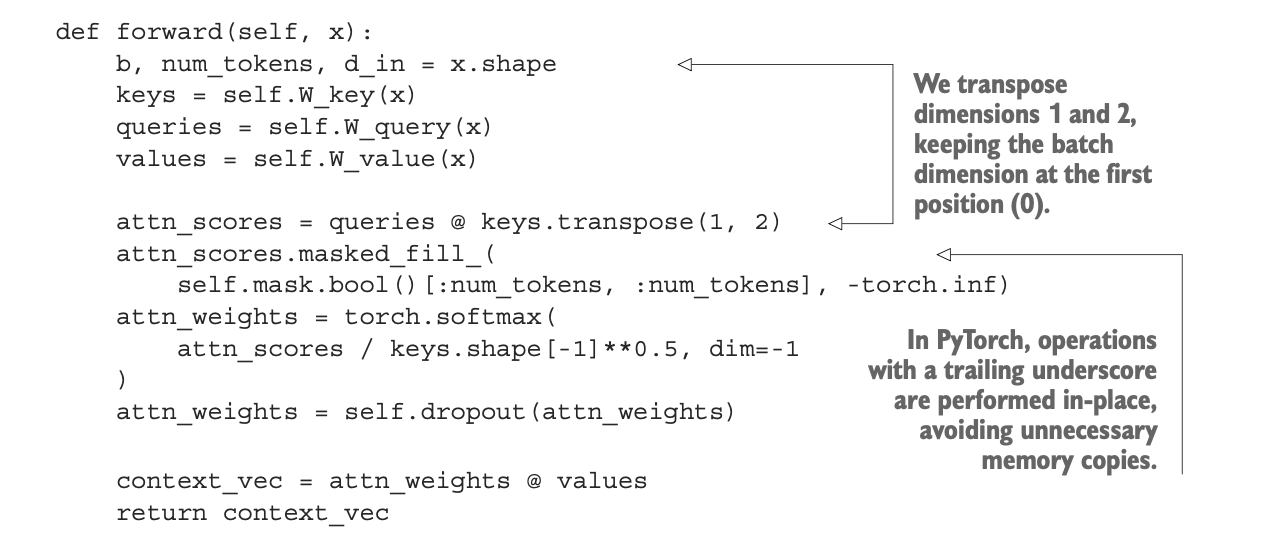

In [55]:
class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias):
        super().__init__()
        
        self.d_out = d_out
        
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)

        self.dropout = nn.Dropout(dropout)

        self.register_buffer(
            'mask',
            torch.triu(torch.ones(context_length, context_length), diagonal = 1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape
        
        keys = self.W_key(x)
        values = self.W_value(x)
        queries = self.W_query(x)

        attn_scores = queries @ keys.transpose(1, 2)

        attn_scores.masked_fill_(self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
        attn_weights = torch.softmax(attn_scores / keys.shape[-1] ** 0.5, dim = -1)

        context_vec = attn_weights @ values

        return context_vec


### Causal Attention on Batched input

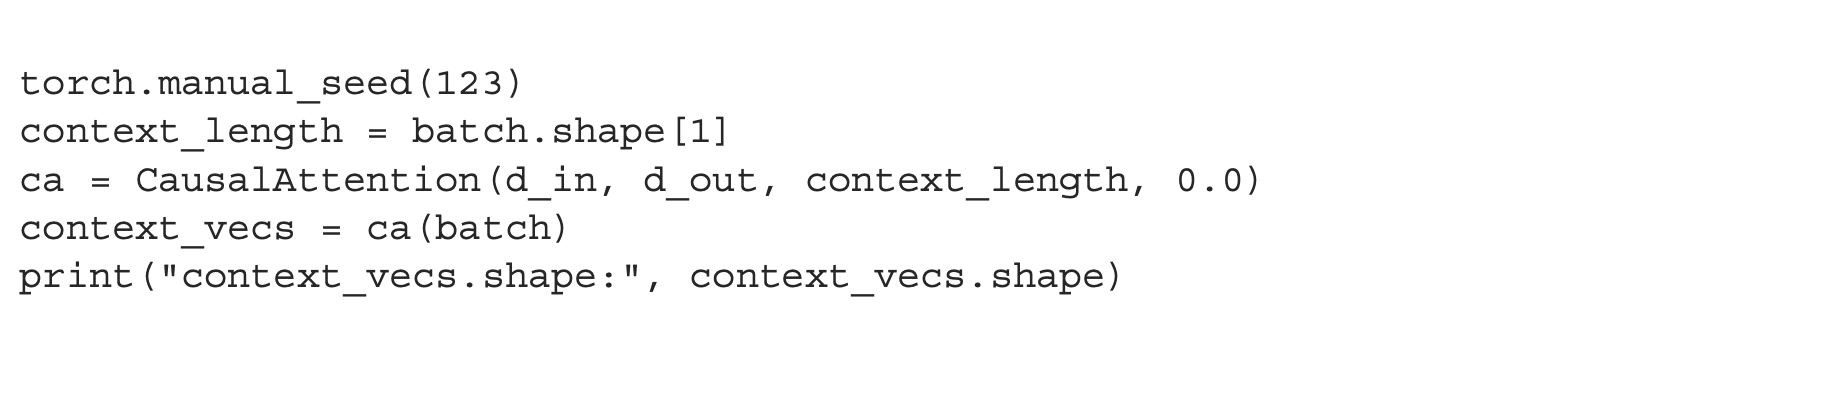

In [69]:
batch = torch.stack((inputs, inputs), dim = 0)

torch.manual_seed(123)

print(f'd_in: {d_in}, d_out: {d_out}')
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0, False)
context_vecs = ca(batch)

print(f"context_vecs.shape: {context_vecs.shape}")

d_in: 3, d_out: 2
context_vecs.shape: torch.Size([2, 6, 2])


In [74]:
a = torch.triu(torch.ones(4, 4), diagonal=1)
a.bool()[:, :]

tensor([[False,  True,  True,  True],
        [False, False,  True,  True],
        [False, False, False,  True],
        [False, False, False, False]])

In [75]:
ca1 = CausalAttention(d_in, d_out, context_length, 0.0, False)

In [79]:
ca1.W_key(inputs)

tensor([[-0.3132, -0.2272],
        [-0.1536,  0.2768],
        [-0.1574,  0.2865],
        [-0.0360,  0.1826],
        [-0.1805,  0.3798],
        [-0.0080,  0.0967]], grad_fn=<MmBackward0>)

In [81]:
ca1.W_key.weight

Parameter containing:
tensor([[-0.2604,  0.1829, -0.2569],
        [ 0.4126,  0.4611, -0.5323]], requires_grad=True)

In [89]:
## (6, 2)
ca1.W_key(inputs) == inputs @ ca1.W_key.weight.T

tensor([[True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True]])

### MultiHeadAttentionClass

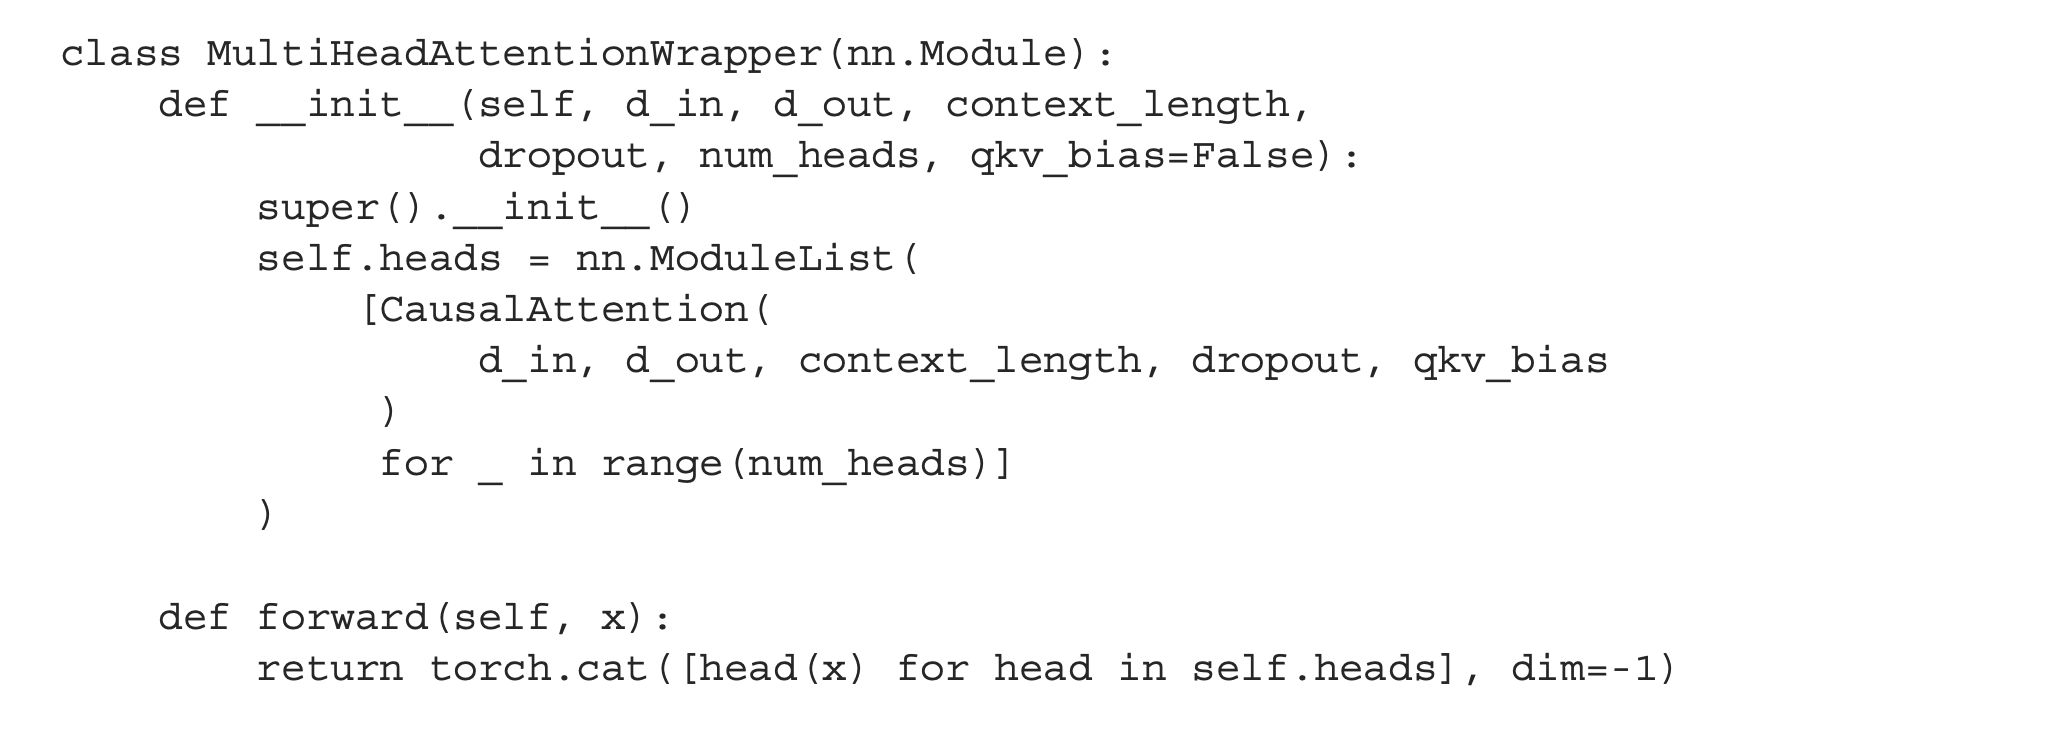

In [ ]:

class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias):
        super().__init__()
        self.d_out = d_out
        
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)

        self.dropout = nn.Dropout(dropout)

        self.register_buffer('mask',
                             torch.triu(torch.ones(context_length, context_length)))
        
    


class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias = False):
        super().__init__()
        self.heads = nn.Module([])